
## Уравнение Бонгоффера-Ван-дер-Поля

$y_{1}'= a(-(\frac{y_{1}^3}{3}-y_{1})+y_{2}) \\
y_{2}'= -y_{1}-by_{2}+c$


In [1]:
#начальные условия
y10 = 2.0
y20 = 0.0
T0 = 0.0
Tk = 20.0
a = 10**(3)
b = 0.5
c = 0.5
h = 10**(-4)

## Метод Рунге-Кутты 4-го порядка:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(y, a, b, c):
    y1 = y[0]
    y2 = y[1]
    f1 = a * (y1 - y1**3/3 + y2)
    f2 = -y1 - b*y2 + c
    result = [f1, f2]
    return np.array(result)

def runge(f, y10, y20, T0, Tk, h, a, b, c):
    N = int(((Tk-T0)/h))
    y = [y10, y20] 
    Y_ = [y]
    y = np.array(y) 
    
    for i in range(N):
        k1 = f(y, a, b, c)
        k2 = f(y + h/2*k1, a, b, c)
        k3 = f(y + h/2*k2, a, b, c)
        k4 = f(y + h*k3, a, b, c)
        y = y + h/6*(k1 + 2*k2 + 2*k3 + k4)
        u = [y[0], y[1]]
        Y_.append(u)
    return Y_

In [3]:
Y_runge2 = runge(f, y10, y20, T0, Tk, h, a, b, c)
t_runge2 = np.linspace(0, Tk, len(Y_runge2))
y1_runge2 = [Y_runge2[i][0] for i in range(len(Y_runge2))]
y2_runge2 = [Y_runge2[i][1] for i in range(len(Y_runge2))]

## Неявный метод Эйлера

$\frac{y^{n+1}-y^{n}}{h} = f_{n+1}$

In [4]:
def jacobian(y, h, a, b, c):
    y1 = y[0]
    y2 = y[1]
    dfdy = np.zeros((2,2))
    dfdy[0][0] = a * h * y1**2 - a * h + 1
    dfdy[0][1] = -a * h
    dfdy[1][0] = h
    dfdy[1][1] = b * h + 1
    return dfdy

def F(y_curr, y_prev, h, a, b, c):
    return (y_curr - y_prev - h*f(y_curr, a, b, c))

In [5]:
def newton(y, h, a, b, c):
    eps = h**3
    max_iter = 10
    y_prev = y.copy()
    y_curr = y.copy()
    for i in range (max_iter):
        y_prev = y_curr.copy()
        delta = np.linalg.solve(jacobian(y_prev,h, a, b, c), F(y_prev, y, h, a, b, c))
        y_curr = y_curr - delta
        if (np.max(np.abs(delta)) < eps):
            break

    return y_curr

In [6]:
def eiler(f, y10, y20, T0, Tk, h, a, b, c):
    N = int((Tk - T0) / h)
    y = [y10, y20] 
    Y_ = [y]
    y = np.array(y)
    
    for i in range(N):
        y = newton(y,h, a, b, c)
        u = [y[0], y[1]]
        Y_.append(u)
    return Y_

In [7]:
Y_eiler = eiler(f, y10, y20, T0, Tk, h, a, b, c)
t_eiler = np.linspace(0, Tk, len(Y_eiler))
y1_eiler = [Y_eiler[i][0] for i in range(len(Y_eiler))]
y2_eiler = [Y_eiler[i][1] for i in range(len(Y_eiler))]

## Неявная формула дифференцирования назад 3 порядка:


$\frac{11}{6}y^{n+1}-3y^{n}+\frac{3}{2}y^{n}-\frac{1}{3}y^{n-2}=hf_{n+1}$

Значения в точках $y^{1}, y^{2}$ найдем с помощью метода Рунге-Кутты 4 порядка

In [20]:
def newton2(y_pr3, y_pr2, y_pr1, h, a, b, c):
    eps = h**3
    max_iter = 10
    y_curr = y_pr1.copy()
    for i in range (max_iter):
        y_prev = y_curr.copy()
        delta = np.dot(np.linalg.inv(jacobian2(y_prev,h, a, b, c)), F2(y_prev, y_pr3, y_pr2, y_pr1, h, a, b, c))
        y_curr = y_curr - delta
        if (np.max(np.abs(delta)) < eps):
            break
          
    return y_curr

def jacobian2(y, h, a, b, c):
    y1 = y[0]
    y2 = y[1]
    dfdy = np.zeros((2,2))
    dfdy[0][0] = 6/11 * a * h * (y1**2 - 1) + 1
    dfdy[0][1] = -6/11 * a * h
    dfdy[1][0] = 6/11 * h
    dfdy[1][1] = 6/11 * b * h + 1
    return dfdy

def F2(y_prev, y_pr3, y_pr2, y_pr1, h, a, b, c):
    return (y_prev - 6/11*(3*y_pr1 - 1.5*y_pr2 + 1/3*y_pr3 + h*f(y_prev, a, b, c)))

In [9]:
def runge_for_bdf(y,h, a, b, c):
    k1 = f(y, a, b, c)
    k2 = f(y + h/2*k1, a, b, c)
    k3 = f(y + h/2*k2, a, b, c)
    k4 = f(y + h*k3, a, b, c)
    return(y + h/6*(k1 + 2*k2 + 2*k3 + k4))
    
def bdf(f, y10, y20, T0, Tk, h, a, b, c):
    N = int((Tk - T0) / h)
    y_pr3 = [y10, y20]
    y_pr2 = runge_for_bdf(y_pr3,h, a, b, c)
    y_pr1= runge_for_bdf(y_pr2,h, a, b, c)
    Y_ = [y_pr3]
    Y_.append([y_pr2[0], y_pr2[1]])
    Y_.append([y_pr1[0], y_pr1[1]])
    y_pr1 = np.array(y_pr1)
    y_pr2 = np.array(y_pr2)
    y_pr3 = np.array(y_pr3)

    for i in range(N):
        y = newton2(y_pr3, y_pr2, y_pr1, h, a, b, c)
        y_pr3 = y_pr2.copy()
        y_pr2 = y_pr1.copy()
        y_pr1 = y.copy()
        u = [y[0], y[1]]
        Y_.append(u)
    return Y_


In [10]:
Y_bdf = bdf(f, y10, y20, T0, Tk, h, a, b, c)
t_bdf = np.linspace(0, Tk, len(Y_bdf))
y1_bdf = [Y_bdf[i][0] for i in range(len(Y_bdf))]
y2_bdf = [Y_bdf[i][1] for i in range(len(Y_bdf))]

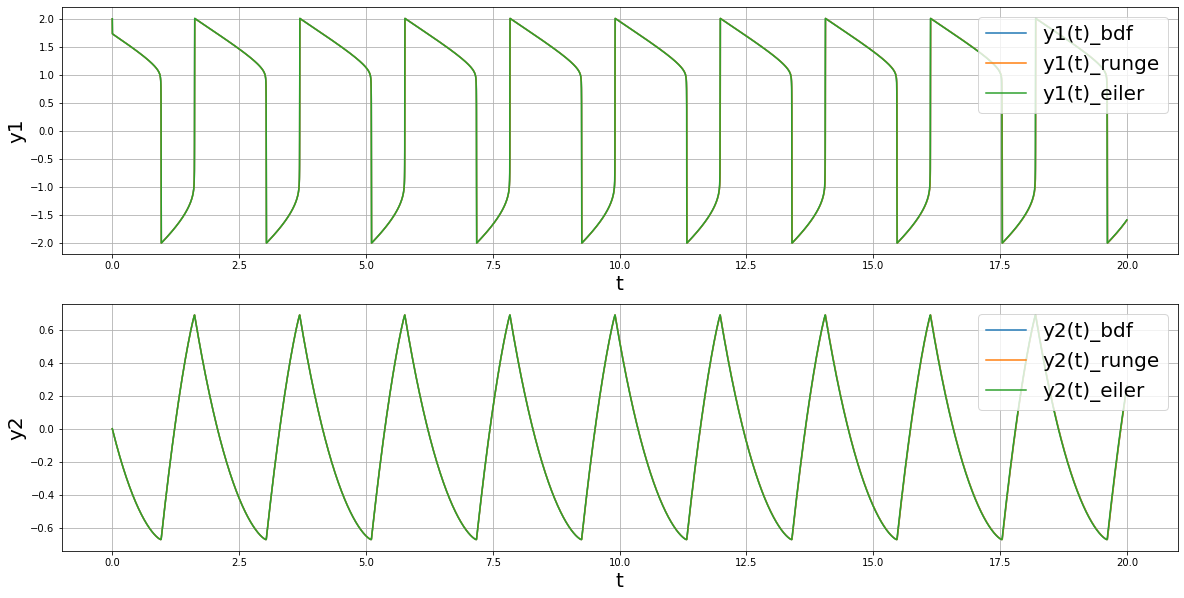

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(211)
plt.grid(True)
plt.xlabel('t', fontsize=20)
plt.ylabel('y1', fontsize=20)
plt.plot(t_bdf, y1_bdf, label='y1(t)_bdf')
plt.plot(t_runge2, y1_runge2, label='y1(t)_runge')
plt.plot(t_eiler, y1_eiler, label='y1(t)_eiler')
plt.legend(loc='upper right', fontsize=20)

plt.subplot(212)
plt.grid(True)
plt.xlabel('t', fontsize=20)
plt.ylabel('y2', fontsize=20)
plt.plot(t_bdf, y2_bdf, label='y2(t)_bdf')
plt.plot(t_runge2, y2_runge2, label='y2(t)_runge')
plt.plot(t_eiler, y2_eiler, label='y2(t)_eiler')
plt.legend(loc='upper right', fontsize=20)

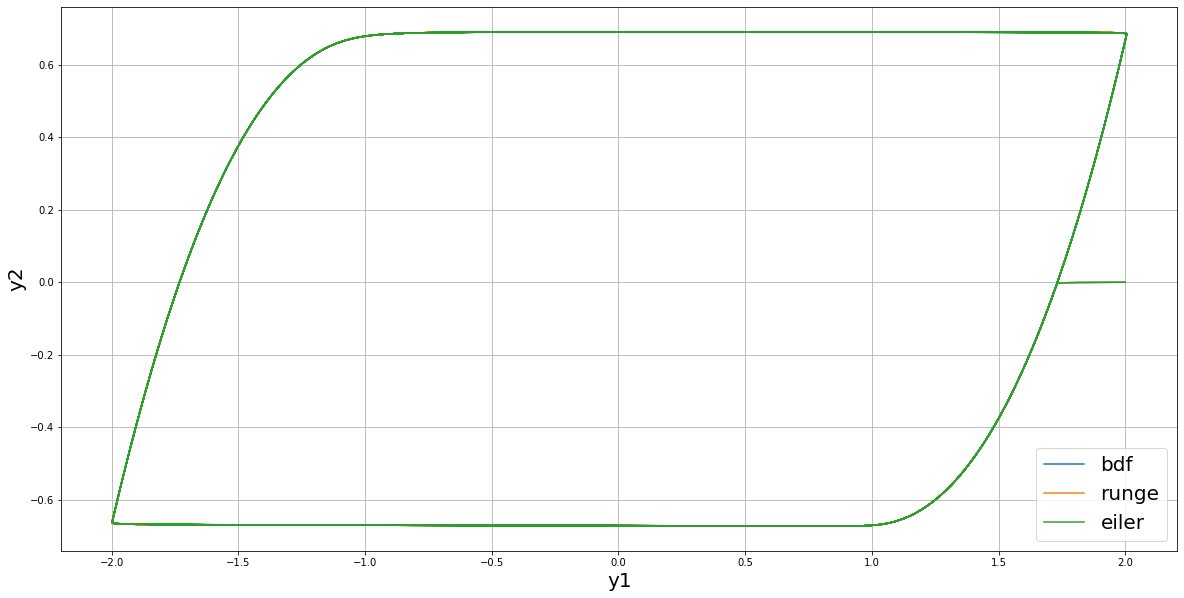

In [12]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('y1', fontsize=20)
plt.ylabel('y2', fontsize=20)
plt.plot(y1_bdf, y2_bdf, label='bdf')
plt.plot(y1_runge2, y2_runge2, label='runge')
plt.plot(y1_eiler, y2_eiler, label='eiler')
plt.legend(loc='lower right', fontsize=20)

## Расчеты в последней точке (t=20)

Метод Эйлера

In [19]:
for h in [0.0002, 0.0001, 0.00005]:
    Y_eiler = eiler(f, y10, y20, T0, Tk, h, a, b, c)
    y1_eiler = [Y_eiler[i][0] for i in range(len(Y_eiler))]
    y2_eiler = [Y_eiler[i][1] for i in range(len(Y_eiler))]
    print('h =', h, 'y1 =', y1_eiler[-1])
    print('h =', h, 'y2 =', y2_eiler[-1])
    print('-------------------------------')

h = 0.0002 y1 = -1.5784544414806683
h = 0.0002 y2 = 0.26883999309314127
-------------------------------
h = 0.0001 y1 = -1.585242880375539
h = 0.0001 y2 = 0.25863167353392674
-------------------------------
h = 5e-05 y1 = -1.5885597169437184
h = 5e-05 y2 = 0.25359088136640373
-------------------------------


ФДН 3 порядка

In [21]:
for h in [0.0002, 0.0001, 0.00005]:
    Y_bdf = bdf(f, y10, y20, T0, Tk, h, a, b, c)
    y1_bdf = [Y_bdf[i][0] for i in range(len(Y_bdf))]
    y2_bdf = [Y_bdf[i][1] for i in range(len(Y_bdf))]
    print('h =', h, 'y1 =', y1_bdf[-1])
    print('h =', h, 'y2 =', y2_bdf[-1])
    print('-------------------------------')

h = 0.0002 y1 = -1.591230961524683
h = 0.0002 y2 = 0.24950588702544754
-------------------------------
h = 0.0001 y1 = -1.591561732763038
h = 0.0001 y2 = 0.24899846878334841
-------------------------------
h = 5e-05 y1 = -1.5916994631777244
h = 5e-05 y2 = 0.24878708149877035
-------------------------------


Метод Рунге-Кутты 4 порядка

In [22]:
for h in [0.001, 0.0005, 0.00025]:
    Y_bdf = bdf(f, y10, y20, T0, Tk, h, a, b, c)
    y1_bdf = [Y_bdf[i][0] for i in range(len(Y_bdf))]
    y2_bdf = [Y_bdf[i][1] for i in range(len(Y_bdf))]
    print('h =', h, 'y1 =', y1_bdf[-1])
    print('h =', h, 'y2 =', y2_bdf[-1])
    print('-------------------------------')

h = 0.001 y1 = -1.5822158647469962
h = 0.001 y2 = 0.263201873414319
-------------------------------
h = 0.0005 y1 = -1.589391993819562
h = 0.0005 y2 = 0.25232061179476634
-------------------------------
h = 0.00025 y1 = -1.5910243948607317
h = 0.00025 y2 = 0.24982259344102586
-------------------------------
